## PRESENTATION (CLASSIFICATION)

### LOGISTIC REGRESSION

In [3]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_partregress
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [197]:
data=pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\IT TRAINING\Presentations\Ppt2 final\Hotel Reservations.csv")

In [198]:
df=pd.DataFrame(data)

In [199]:

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [200]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [201]:
df=df.drop(['Booking_ID'],axis=1)

In [202]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [203]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [204]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


<Axes: >

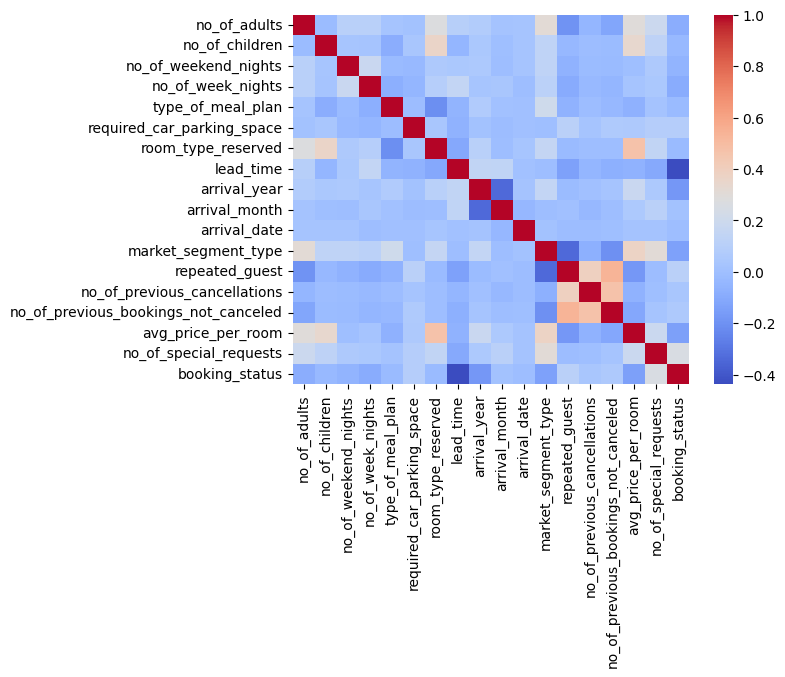

In [205]:
matrix=df.corr()
sns.heatmap(matrix,cmap='coolwarm')

In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# TRANSFORMATION

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_normalized.round(1))

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0               0.5             0.0                   0.1                0.1   
1               0.5             0.0                   0.3                0.2   
2               0.2             0.0                   0.3                0.1   
3               0.5             0.0                   0.0                0.1   
4               0.5             0.0                   0.1                0.1   
...             ...             ...                   ...                ...   
36270           0.8             0.0                   0.3                0.4   
36271           0.5             0.0                   0.1                0.2   
36272           0.5             0.0                   0.3                0.4   
36273           0.5             0.0                   0.0                0.2   
36274           0.5             0.0                   0.1                0.1   

       type_of_meal_plan  required_car_

In [207]:
df=df_normalized

In [208]:
from scipy.stats import stats
import numpy as np

def replace_outliers_with_mean(df):
    for column in df.columns:
        # Calculate the Z-scores
        z_scores = np.abs(stats.zscore(df[column]))
        
        # Define a threshold for identifying outliers
        threshold = 3  # Typically, a Z-score greater than 3 is considered an outlier
        
        # Calculate the mean of the column
        mean_value = df[column].mean()
        
        # Replace outliers with the mean
        df[column] = np.where(z_scores > threshold, mean_value, df[column])
        
    return df

# Apply the function to the DataFrame
df_cleaned = replace_outliers_with_mean(df)

print(df_cleaned)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0              0.50             0.0              0.142857           0.117647   
1              0.50             0.0              0.285714           0.176471   
2              0.25             0.0              0.285714           0.058824   
3              0.50             0.0              0.000000           0.117647   
4              0.50             0.0              0.142857           0.058824   
...             ...             ...                   ...                ...   
36270          0.75             0.0              0.285714           0.352941   
36271          0.50             0.0              0.142857           0.176471   
36272          0.50             0.0              0.285714           0.352941   
36273          0.50             0.0              0.000000           0.176471   
36274          0.50             0.0              0.142857           0.117647   

       type_of_meal_plan  required_car_

C:\Users\Admin\AppData\Local\Temp\ipykernel_18552\2242685581.py:7: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = np.abs(stats.zscore(df[column]))
C:\Users\Admin\AppData\Local\Temp\ipykernel_18552\2242685581.py:7: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = np.abs(stats.zscore(df[column]))
C:\Users\Admin\AppData\Local\Temp\ipykernel_18552\2242685581.py:7: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_scores = np.abs(stats.zscore(df[column]))
C:\Users\Admin\AppData\Local\Temp\ipykernel_18552\2242685581.py:7: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace 

In [209]:
df=df_cleaned

# lead_time transformation

<Axes: xlabel='lead_time', ylabel='Count'>

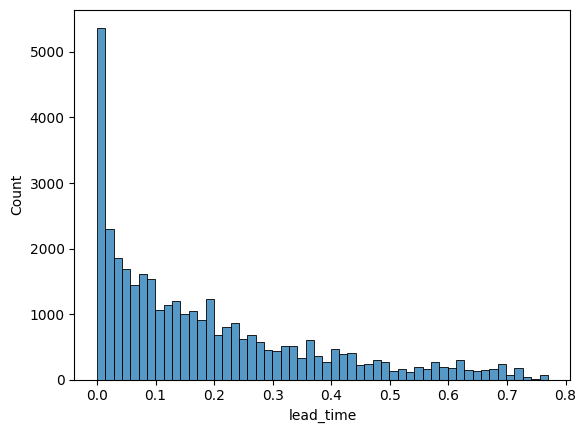

In [210]:
sns.histplot(df['lead_time'])

In [211]:
from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to column 'A'
df['lead_time'] = pt.fit_transform(df[['lead_time']])

<Axes: xlabel='lead_time', ylabel='Count'>

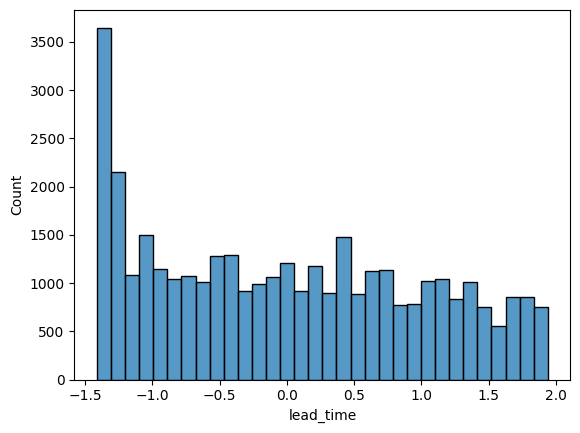

In [212]:
sns.histplot(df['lead_time'])

In [213]:
from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to column 'A'
df['lead_time'] = pt.fit_transform(df[['lead_time']])

<Axes: xlabel='lead_time', ylabel='Count'>

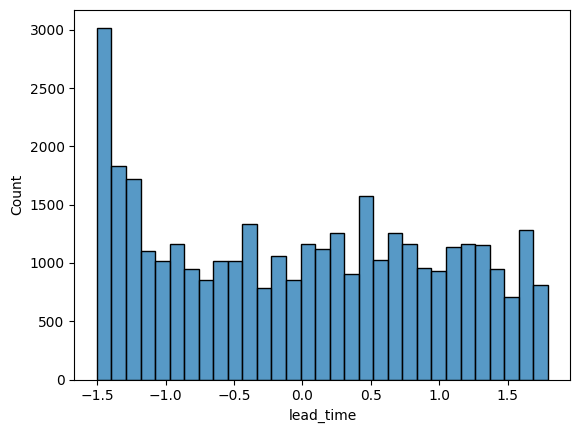

In [214]:
sns.histplot(df['lead_time'])

# no_of_week_nights transformation

<Axes: xlabel='no_of_week_nights', ylabel='Count'>

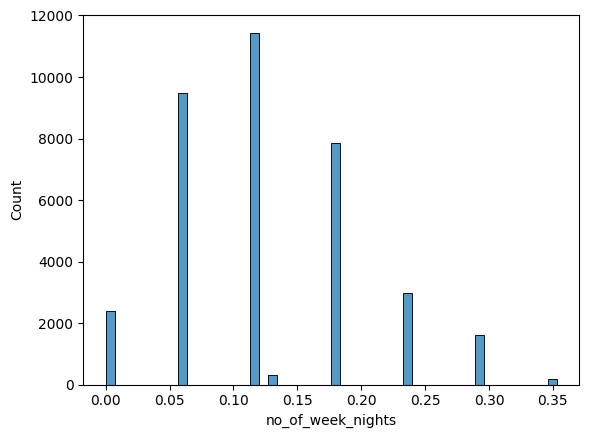

In [215]:
sns.histplot(df['no_of_week_nights'])

In [216]:

pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to column 'A'
df['no_of_week_nights'] = pt.fit_transform(df[['no_of_week_nights']])

<Axes: xlabel='no_of_week_nights', ylabel='Count'>

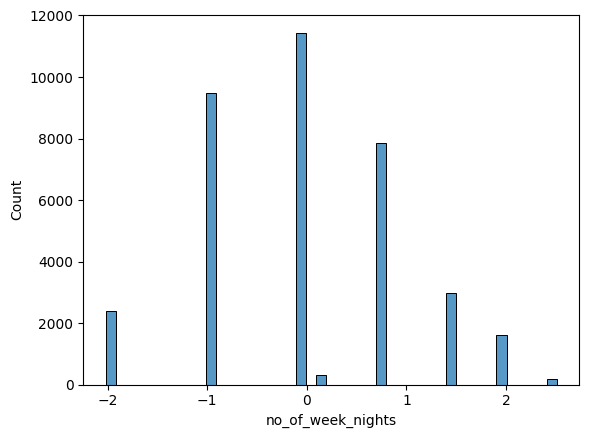

In [217]:
sns.histplot(df['no_of_week_nights'])

# average_price_per_room transformation

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

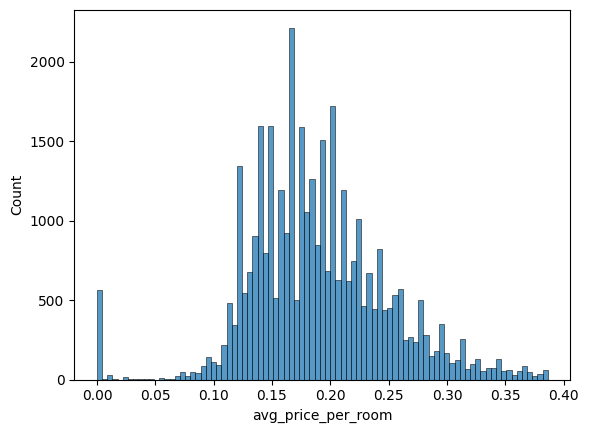

In [218]:
sns.histplot(df['avg_price_per_room'])

In [219]:

pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to column 'A'
df['avg_price_per_room'] = pt.fit_transform(df[['avg_price_per_room']])

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

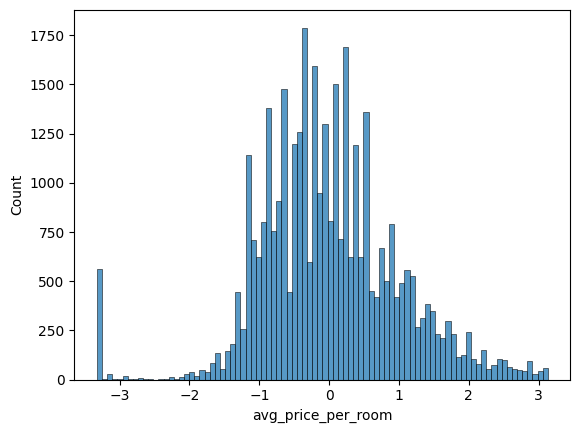

In [220]:
sns.histplot(df['avg_price_per_room'])

In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## logistic regression

#### BIVARIATE

In [221]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)


In [222]:
model_simple = smf.logit('booking_status ~ lead_time', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.543900
         Iterations 6


In [223]:
# Predicting probabilities on train and test data
train_probs = model_simple.predict(train_data)
test_probs = model_simple.predict(test_data)

# Classify based on a threshold of 0.5
train_predictions = (train_probs > 0.5).astype(int)
test_predictions = (test_probs > 0.5).astype(int)

In [224]:
# Confusion matrix for train data
train_cm = confusion_matrix(train_data['booking_status'], train_predictions)
print("Confusion Matrix - Train Data")
print(train_cm)

# Confusion matrix for test data
test_cm = confusion_matrix(test_data['booking_status'], test_predictions)
print("Confusion Matrix - Test Data")
print(test_cm)

Confusion Matrix - Train Data
[[ 3821  4457]
 [ 2298 14816]]
Confusion Matrix - Test Data
[[1654 1953]
 [ 909 6367]]


In [225]:
def calculate_metrics(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(actual, predicted)
    sensitivity = recall_score(actual, predicted)
    specificity = tn / (tn + fp)
    f1 = f1_score(actual, predicted)
    return accuracy, sensitivity, specificity, f1

train_accuracy, train_sensitivity, train_specificity, train_f1 = calculate_metrics(train_data['booking_status'], train_predictions)
test_accuracy, test_sensitivity, test_specificity, test_f1 = calculate_metrics(test_data['booking_status'], test_predictions)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Train Sensitivity: {train_sensitivity:.2f}")
print(f"Train Specificity: {train_specificity:.2f}")
print(f"Train F1 Score: {train_f1:.2f}")

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Sensitivity: {test_sensitivity:.2f}")
print(f"Test Specificity: {test_specificity:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")


Train Accuracy: 0.73
Train Sensitivity: 0.87
Train Specificity: 0.46
Train F1 Score: 0.81
Test Accuracy: 0.74
Test Sensitivity: 0.88
Test Specificity: 0.46
Test F1 Score: 0.82


### MULTIVARIATE

In [226]:

# Multivariate Logistic Regression
model_multivariate = smf.logit('booking_status ~ repeated_guest + no_of_special_requests + lead_time', data=train_data).fit()


Optimization terminated successfully.
         Current function value: 0.516584
         Iterations 9


In [227]:
print(model_multivariate.summary())

# Predicting probabilities on train and test data
train_probs_multivariate = model_multivariate.predict(train_data)
test_probs_multivariate = model_multivariate.predict(test_data)

# Classify based on a threshold of 0.5
train_predictions_multivariate = (train_probs_multivariate > 0.5).astype(int)
test_predictions_multivariate = (test_probs_multivariate > 0.5).astype(int)

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25388
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                  0.1817
Time:                        19:59:25   Log-Likelihood:                -13117.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4450      0.019     23.396      0.000       0.408       0.482
repeated_guest           100.1911     13.270      7.550      0.000      74.182     126.200
no_o

In [228]:
# Confusion matrix for multivariate model on train data
train_cm_multivariate = confusion_matrix(train_data['booking_status'], train_predictions_multivariate)
print("Confusion Matrix - Multivariate Model Train Data")
print(train_cm_multivariate)

# Confusion matrix for multivariate model on test data
test_cm_multivariate = confusion_matrix(test_data['booking_status'], test_predictions_multivariate)
print("Confusion Matrix - Multivariate Model Test Data")
print(test_cm_multivariate)

Confusion Matrix - Multivariate Model Train Data
[[ 3996  4282]
 [ 2230 14884]]
Confusion Matrix - Multivariate Model Test Data
[[1711 1896]
 [ 904 6372]]


In [229]:

# Calculate metrics for multivariate model
train_accuracy_multivariate, train_sensitivity_multivariate, train_specificity_multivariate, train_f1_multivariate = calculate_metrics(train_data['booking_status'], train_predictions_multivariate)
test_accuracy_multivariate, test_sensitivity_multivariate, test_specificity_multivariate, test_f1_multivariate = calculate_metrics(test_data['booking_status'], test_predictions_multivariate)

print(f"Multivariate Train Accuracy: {train_accuracy_multivariate:.2f}")
print(f"Multivariate Train Sensitivity: {train_sensitivity_multivariate:.2f}")
print(f"Multivariate Train Specificity: {train_specificity_multivariate:.2f}")
print(f"Multivariate Train F1 Score: {train_f1_multivariate:.2f}")

print(f"Multivariate Test Accuracy: {test_accuracy_multivariate:.2f}")
print(f"Multivariate Test Sensitivity: {test_sensitivity_multivariate:.2f}")
print(f"Multivariate Test Specificity: {test_specificity_multivariate:.2f}")
print(f"Multivariate Test F1 Score: {test_f1_multivariate:.2f}")


Multivariate Train Accuracy: 0.74
Multivariate Train Sensitivity: 0.87
Multivariate Train Specificity: 0.48
Multivariate Train F1 Score: 0.82
Multivariate Test Accuracy: 0.74
Multivariate Test Sensitivity: 0.88
Multivariate Test Specificity: 0.47
Multivariate Test F1 Score: 0.82


### LINEAR DISCRIMINANT ANALYSIS

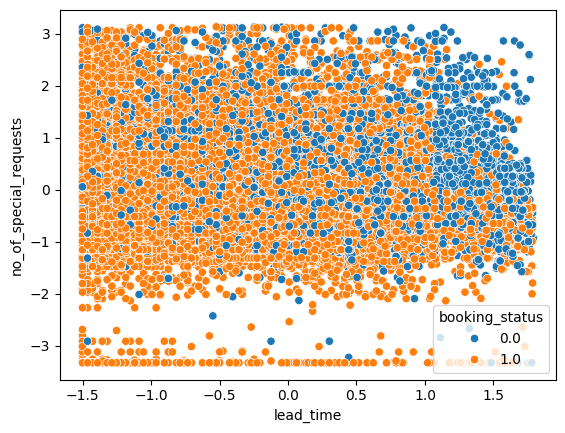

In [230]:
sns.scatterplot(data=df,x='lead_time',y='avg_price_per_room',hue='booking_status')

plt.xlabel('lead_time')
plt.ylabel('no_of_special_requests')
plt.show()

#### BIVARIATE

In [231]:
y = df.booking_status
X = df.lead_time
X = pd.get_dummies(X, drop_first=True)
X = X.astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Columns: 334 entries, -1.4641305033655092 to 1.7917993708488986
dtypes: float64(334)
memory usage: 92.4 MB


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [234]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Perform Linear Discriminant Analysis (LDA) on the training set
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train_encoded)


LinearDiscriminantAnalysis()

In [235]:

# Predict the labels for the training and test sets
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

# Calculate performance metrics for training set
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
train_precision = precision_score(y_train_encoded, y_train_pred)
train_recall = recall_score(y_train_encoded, y_train_pred)
train_f1 = f1_score(y_train_encoded, y_train_pred)

# Calculate performance metrics for test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
test_precision = precision_score(y_test_encoded, y_test_pred)
test_recall = recall_score(y_test_encoded, y_test_pred)
test_f1 = f1_score(y_test_encoded, y_test_pred)

# Print performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

Training Accuracy: 0.77
Training Precision: 0.78
Training Recall: 0.93
Training F1-Score: 0.85

Test Accuracy: 0.77
Test Precision: 0.77
Test Recall: 0.93
Test F1-Score: 0.84


<Figure size 800x600 with 0 Axes>

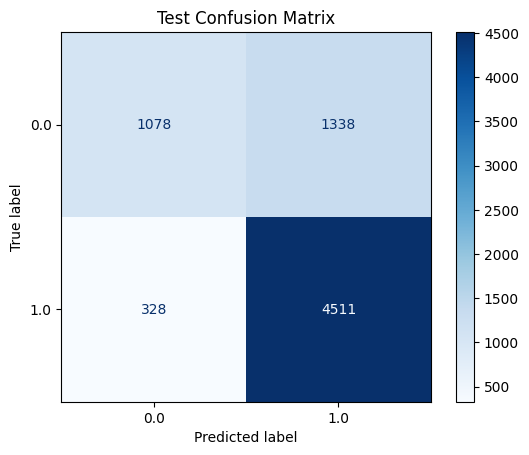

<Figure size 800x600 with 0 Axes>

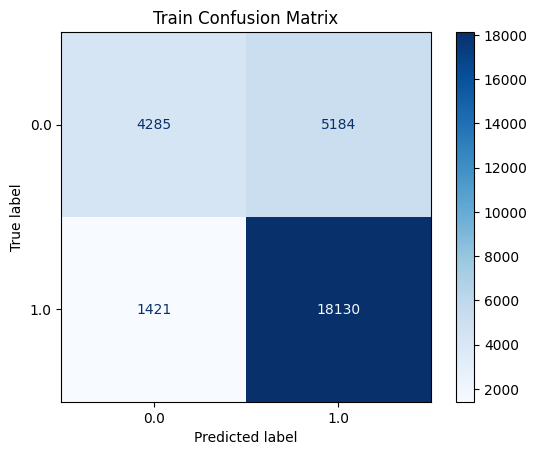

In [236]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test_encoded, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

 
    # Calculate the confusion matrix for the train set
cm = confusion_matrix(y_train_encoded, y_train_pred)
    # Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

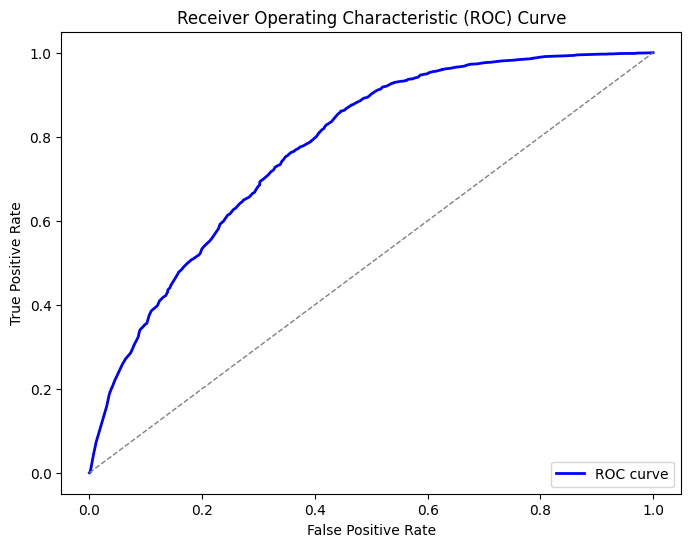

In [237]:
# Calculate the probability estimates for the test set
y_prob = lda.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### MULTIVARIATE

In [238]:
y_mv = df.booking_status
X_mv = df.drop(['booking_status'],axis=1)
X_mv = pd.get_dummies(X_mv, drop_first=True)
X_mv = X_mv.astype('float64')
X_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  float64
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   type_of_meal_plan                     36275 non-null  float64
 5   required_car_parking_space            36275 non-null  float64
 6   room_type_reserved                    36275 non-null  float64
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  float64
 9   arrival_month                         36275 non-null  float64
 10  arrival_date                          36275 non-null  float64
 11  market_segment_

In [239]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_mv, y_mv, test_size=0.2, random_state=42)

In [240]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_lda, y_train_lda)

LinearDiscriminantAnalysis()

In [241]:
label_encoder = LabelEncoder()
y_train_encoded_lda = label_encoder.fit_transform(y_train_lda)
y_test_encoded_lda = label_encoder.fit_transform(y_test_lda)

# Perform Linear Discriminant Analysis (LDA) on the training set
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_lda, y_train_encoded_lda)


LinearDiscriminantAnalysis()

In [242]:
# Predict the labels for the training and test sets
y_train_pred_lda = lda.predict(X_train_lda)
y_test_pred_lda = lda.predict(X_test_lda)

# Calculate performance metrics for training set
train_accuracy = accuracy_score(y_train_encoded_lda, y_train_pred_lda)
train_precision = precision_score(y_train_encoded_lda, y_train_pred_lda)
train_recall = recall_score(y_train_encoded_lda, y_train_pred_lda)
train_f1 = f1_score(y_train_encoded_lda, y_train_pred_lda)

# Calculate performance metrics for test set
test_accuracy = accuracy_score(y_test_encoded_lda, y_test_pred_lda)
test_precision = precision_score(y_test_encoded_lda, y_test_pred_lda)
test_recall = recall_score(y_test_encoded_lda, y_test_pred_lda)
test_f1 = f1_score(y_test_encoded_lda, y_test_pred_lda)

# Print performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

Training Accuracy: 0.78
Training Precision: 0.81
Training Recall: 0.87
Training F1-Score: 0.84

Test Accuracy: 0.78
Test Precision: 0.81
Test Recall: 0.88
Test F1-Score: 0.84


<Figure size 800x600 with 0 Axes>

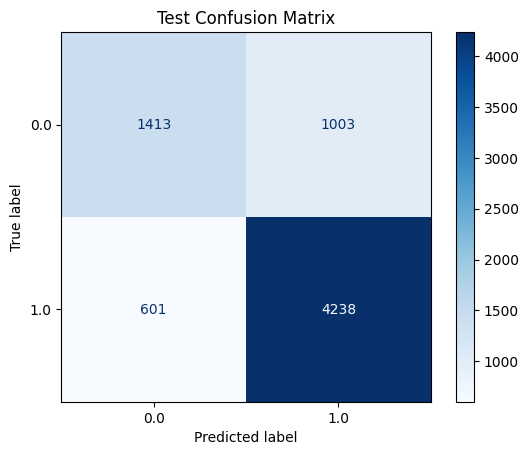

<Figure size 800x600 with 0 Axes>

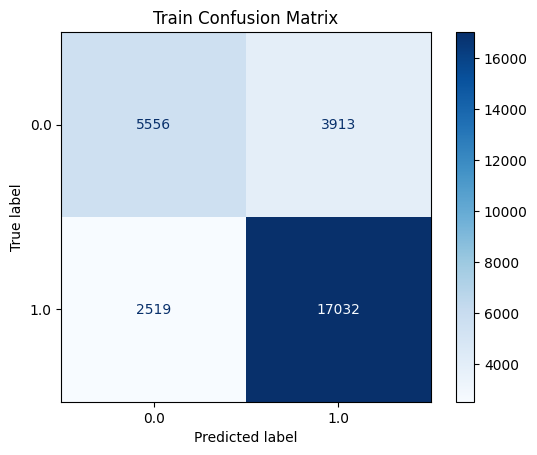

In [243]:
cm = confusion_matrix(y_test_encoded_lda, y_test_pred_lda)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

 
    # Calculate the confusion matrix for the train set
cm = confusion_matrix(y_train_encoded_lda, y_train_pred_lda)
    # Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

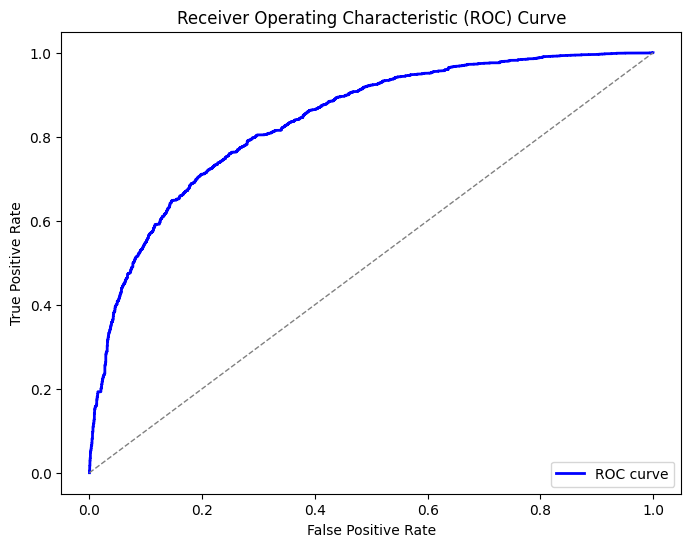

In [244]:
y_prob = lda.predict_proba(X_test_lda)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded_lda, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Quadratic Discriminant Analysis

#### BIVARIATE

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [289]:

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [290]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Perform QDA on the training set
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train_encoded)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [291]:

# Predict the labels for the training and test sets
y_train_pred = qda.predict(X_train)
y_test_pred = qda.predict(X_test)

# Calculate performance metrics for training set
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
train_precision = precision_score(y_train_encoded, y_train_pred)
train_recall = recall_score(y_train_encoded, y_train_pred)
train_f1 = f1_score(y_train_encoded, y_train_pred)

# Calculate performance metrics for test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
test_precision = precision_score(y_test_encoded, y_test_pred)
test_recall = recall_score(y_test_encoded, y_test_pred)
test_f1 = f1_score(y_test_encoded, y_test_pred)

# Print performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")


Training Accuracy: 0.75
Training Precision: 0.76
Training Recall: 0.93
Training F1-Score: 0.83

Test Accuracy: 0.75
Test Precision: 0.75
Test Recall: 0.93
Test F1-Score: 0.83


<Figure size 800x600 with 0 Axes>

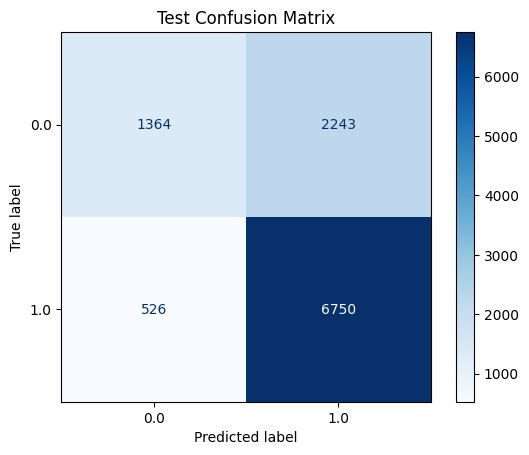

<Figure size 800x600 with 0 Axes>

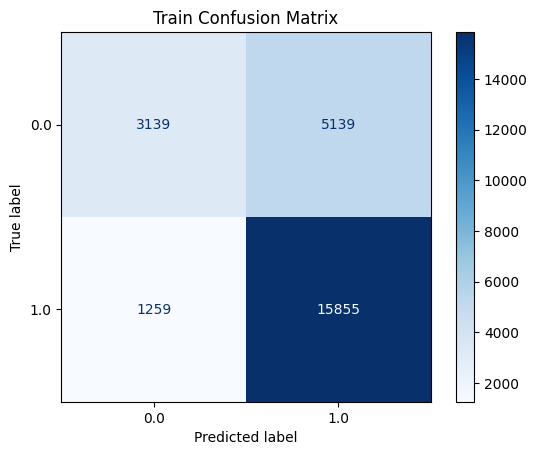

In [292]:
cm = confusion_matrix(y_test_encoded, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

 
    # Calculate the confusion matrix for the train set
cm = confusion_matrix(y_train_encoded, y_train_pred)
    # Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### MULTIVARIATE

In [293]:
X_train_qda, X_test_qda, y_train_qda, y_test_qda = train_test_split(X_mv, y_mv, test_size=0.2, random_state=42)

In [294]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_qda, y_train_qda)

QuadraticDiscriminantAnalysis()

In [295]:
label_encoder = LabelEncoder()
y_train_encoded_qda = label_encoder.fit_transform(y_train_qda)
y_test_encoded_qda = label_encoder.fit_transform(y_test_qda)

# Perform QDA on the training set
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_qda, y_train_encoded_qda)

# Predict the labels for the training and test sets
y_train_pred_qda = qda.predict(X_train_qda)
y_test_pred_qda = qda.predict(X_test_qda)

In [298]:
train_accuracy_qda = accuracy_score(y_train_encoded_qda, y_train_pred_qda)
train_precision_qda = precision_score(y_train_encoded_qda, y_train_pred_qda)
train_recall_qda = recall_score(y_train_encoded_qda, y_train_pred_qda)
train_f1_qda = f1_score(y_train_encoded_qda, y_train_pred_qda)

# Calculate performance metrics for test set
test_accuracy_qda = accuracy_score(y_test_encoded_qda, y_test_pred_qda)
test_precision_qda = precision_score(y_test_encoded_qda, y_test_pred_qda)
test_recall_qda = recall_score(y_test_encoded_qda, y_test_pred_qda)
test_f1_qda = f1_score(y_test_encoded_qda, y_test_pred_qda)

# Print performance metrics
print(f"Training Accuracy: {train_accuracy_qda:.2f}")
print(f"Training Precision: {train_precision_qda:.2f}")
print(f"Training Recall: {train_recall_qda:.2f}")
print(f"Training F1-Score: {train_f1_qda:.2f}")
print()
print(f"Test Accuracy: {test_accuracy_qda:.2f}")
print(f"Test Precision: {test_precision_qda:.2f}")
print(f"Test Recall: {test_recall_qda:.2f}")
print(f"Test F1-Score: {test_f1_qda:.2f}")


Training Accuracy: 0.44
Training Precision: 0.95
Training Recall: 0.18
Training F1-Score: 0.31

Test Accuracy: 0.44
Test Precision: 0.94
Test Recall: 0.18
Test F1-Score: 0.30


<Figure size 800x600 with 0 Axes>

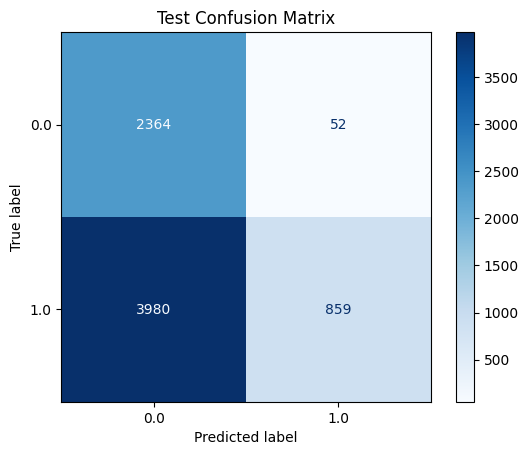

<Figure size 800x600 with 0 Axes>

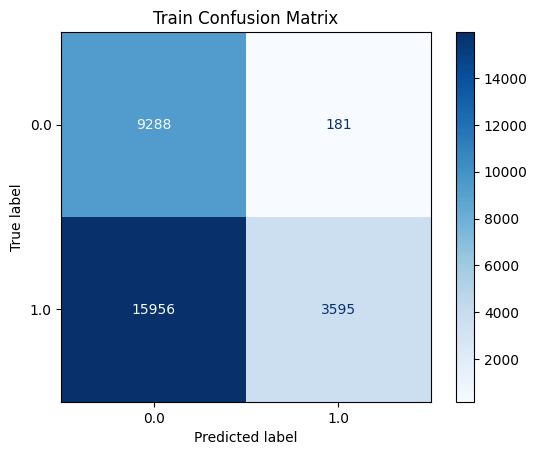

In [299]:
cm = confusion_matrix(y_test_encoded_qda, y_test_pred_qda)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

 
    # Calculate the confusion matrix for the train set
cm = confusion_matrix(y_train_encoded_qda, y_train_pred_qda)
    # Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### SUPPORT VECTOR MACHINE

#### BIVARIATE

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [258]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [261]:


# Perform SVM on the training set
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [262]:

# Predict the labels for the training and test sets
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate performance metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate performance metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")


Training Accuracy: 0.77
Training Precision: 0.77
Training Recall: 0.93
Training F1-Score: 0.85

Test Accuracy: 0.77
Test Precision: 0.77
Test Recall: 0.94
Test F1-Score: 0.84


<Figure size 800x600 with 0 Axes>

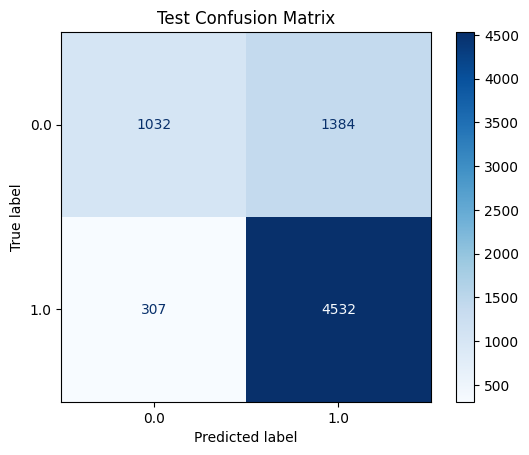

<Figure size 800x600 with 0 Axes>

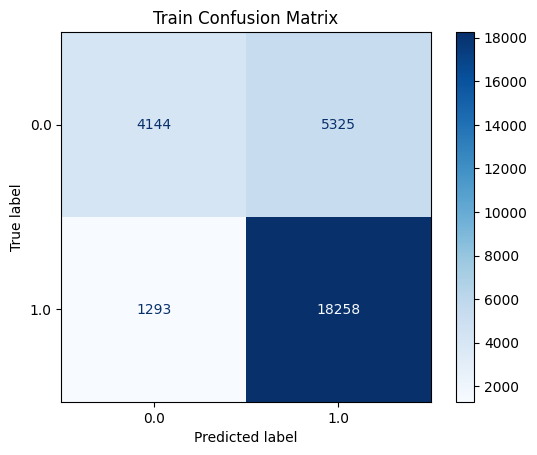

In [264]:
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

 
    # Calculate the confusion matrix for the train set
cm = confusion_matrix(y_train, y_train_pred)
    # Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

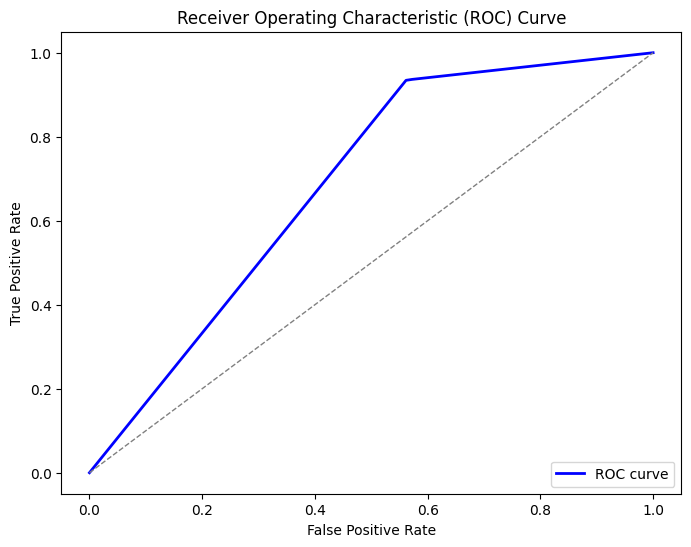

In [266]:
decision_scores = svm.decision_function(X_test)

# Apply sigmoid function to convert decision scores into probabilities
y_prob = 1 / (1 + np.exp(-decision_scores))

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [267]:
results = []

# List of kernel types to compare
kernels = ['linear', 'poly', 'rbf']

In [269]:

for kernel in kernels:
    # Perform SVM on the training set with different kernels
    svm = SVC(kernel=kernel, C=1.0, random_state=42)
    svm.fit(X_train, y_train)

    # Predict the labels for the training and test sets
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    # Calculate performance metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Calculate performance metrics for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Append results to the list
    results.append({
        'Kernel': kernel,
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1-Score': train_f1,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1-Score': test_f1
    })

# Create DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)

   Kernel  Train Accuracy  Train Precision  Train Recall  Train F1-Score  \
0  linear        0.771950         0.774202      0.933865        0.846571   
1    poly        0.772398         0.776529      0.929722        0.846249   
2     rbf        0.772398         0.776529      0.929722        0.846249   

   Test Accuracy  Test Precision  Test Recall  Test F1-Score  
0       0.766919        0.766058     0.936557       0.842771  
1       0.769125        0.769139     0.934284       0.843706  
2       0.769125        0.769139     0.934284       0.843706  


#### MULTIVARIATE

In [270]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_mv, y_mv, test_size=0.2, random_state=42)

In [271]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_svm, y_train_svm)
 

SVC(kernel='linear', random_state=42)

In [272]:
label_encoder = LabelEncoder()
y_train_encoded_svm= label_encoder.fit_transform(y_train_svm)
y_test_encoded_svm = label_encoder.fit_transform(y_test_svm)

# Perform SVM on the training set
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_svm, y_train_encoded_svm)

# Predict the labels for the training and test sets
y_train_pred_svm = svm.predict(X_train_svm)
y_test_pred_svm = svm.predict(X_test_svm)

# Calculate performance metrics for training set
train_accuracy = accuracy_score(y_train_encoded_svm, y_train_pred_svm)
train_precision = precision_score(y_train_encoded_svm, y_train_pred_svm)
train_recall = recall_score(y_train_encoded_svm, y_train_pred_svm)
train_f1 = f1_score(y_train_encoded_svm, y_train_pred_svm)

# Calculate performance metrics for test set
test_accuracy = accuracy_score(y_test_encoded_svm, y_test_pred_svm)
test_precision = precision_score(y_test_encoded_svm, y_test_pred_svm)
test_recall = recall_score(y_test_encoded_svm, y_test_pred_svm)
test_f1 = f1_score(y_test_encoded_svm, y_test_pred_svm)

# Print performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")


Training Accuracy: 0.78
Training Precision: 0.81
Training Recall: 0.88
Training F1-Score: 0.85

Test Accuracy: 0.78
Test Precision: 0.81
Test Recall: 0.89
Test F1-Score: 0.85


<Figure size 800x600 with 0 Axes>

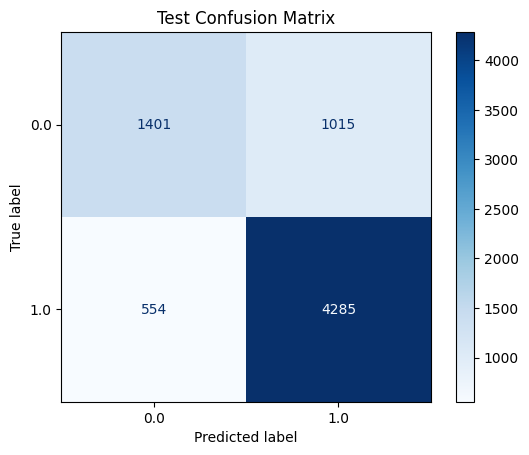

<Figure size 800x600 with 0 Axes>

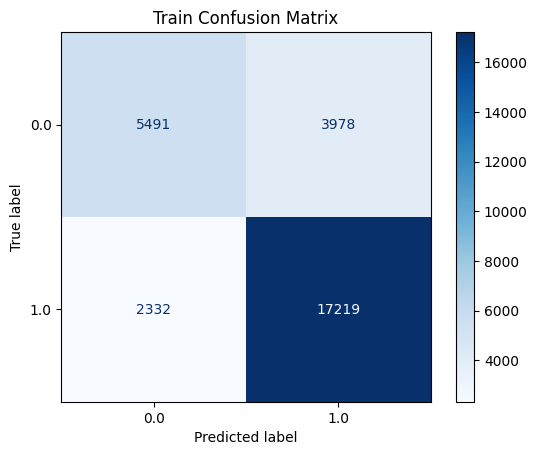

In [273]:
cm = confusion_matrix(y_test_encoded_svm, y_test_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

 
    # Calculate the confusion matrix for the train set
cm = confusion_matrix(y_train_encoded_svm, y_train_pred_svm)
    # Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

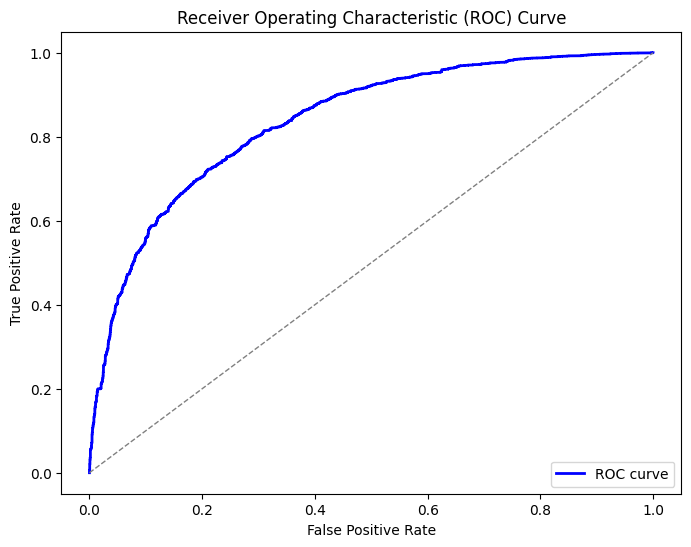

In [274]:
decision_scores = svm.decision_function(X_test_svm)

# Apply sigmoid function to convert decision scores into probabilities
y_prob = 1 / (1 + np.exp(-decision_scores))

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded_svm, y_prob)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [62]:
results = []

# List of kernel types to compare
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    # Perform SVM on the training set with different kernels
    svm = SVC(kernel=kernel, C=1.0, random_state=42)
    svm.fit(X_train_svm, y_train_encoded_svm)

    # Predict the labels for the training and test sets
    y_train_pred = svm.predict(X_train_svm)
    y_test_pred = svm.predict(X_test_svm)

    # Calculate performance metrics for training set
    train_accuracy = accuracy_score(y_train_encoded_svm, y_train_pred_svm)
    train_precision = precision_score(y_train_encoded_svm, y_train_pred_svm)
    train_recall = recall_score(y_train_encoded_svm, y_train_pred_svm)
    train_f1 = f1_score(y_train_encoded_svm, y_train_pred_svm)

    # Calculate performance metrics for test set
    test_accuracy = accuracy_score(y_test_encoded_svm, y_test_pred_svm)
    test_precision = precision_score(y_test_encoded_svm, y_test_pred_svm)
    test_recall = recall_score(y_test_encoded_svm, y_test_pred_svm)
    test_f1 = f1_score(y_test_encoded_svm, y_test_pred_svm)

    # Append results to the list
    results.append({
        'Kernel': kernel,
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1-Score': train_f1,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1-Score': test_f1
    })

# Create DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)

   Kernel  Train Accuracy  Train Precision  Train Recall  Train F1-Score  \
0  linear        0.786216         0.802887      0.904813        0.850808   
1    poly        0.786216         0.802887      0.904813        0.850808   
2     rbf        0.786216         0.802887      0.904813        0.850808   

   Test Accuracy  Test Precision  Test Recall  Test F1-Score  
0       0.786768        0.799818     0.907419       0.850228  
1       0.786768        0.799818     0.907419       0.850228  
2       0.786768        0.799818     0.907419       0.850228  


### KNN

#### BIVARIATE

In [275]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [276]:
k = 3  # You can change the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [277]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train_encoded)

# Predict the labels for the training and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [278]:
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
train_precision = precision_score(y_train_encoded, y_train_pred)
train_recall = recall_score(y_train_encoded, y_train_pred)
train_f1 = f1_score(y_train_encoded, y_train_pred)

# Calculate performance metrics for test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
test_precision = precision_score(y_test_encoded, y_test_pred)
test_recall = recall_score(y_test_encoded, y_test_pred)
test_f1 = f1_score(y_test_encoded, y_test_pred)

# Print performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")


Training Accuracy: 0.72
Training Precision: 0.78
Training Recall: 0.82
Training F1-Score: 0.80

Test Accuracy: 0.71
Test Precision: 0.77
Test Recall: 0.82
Test F1-Score: 0.79


<Figure size 800x600 with 0 Axes>

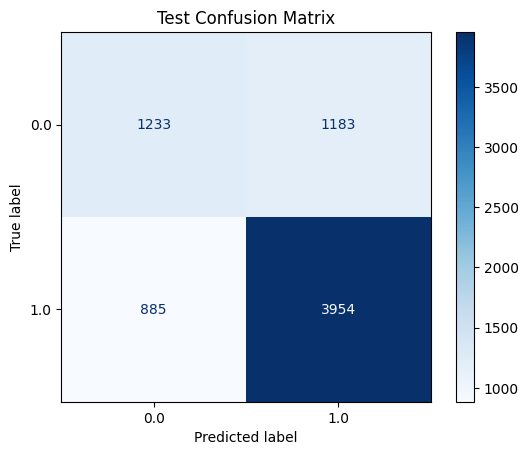

<Figure size 800x600 with 0 Axes>

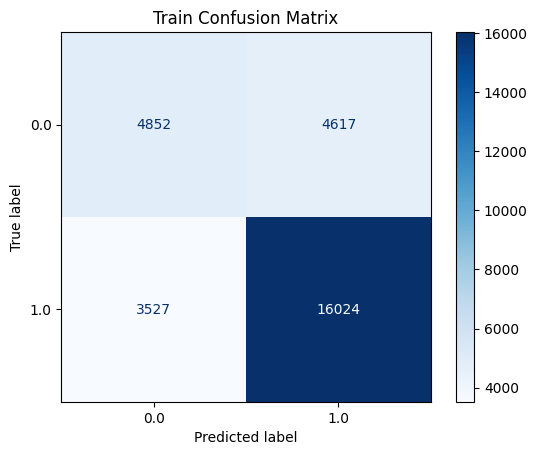

In [279]:
cm = confusion_matrix(y_test_encoded, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

 
    # Calculate the confusion matrix for the train set
cm = confusion_matrix(y_train_encoded, y_train_pred)
    # Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

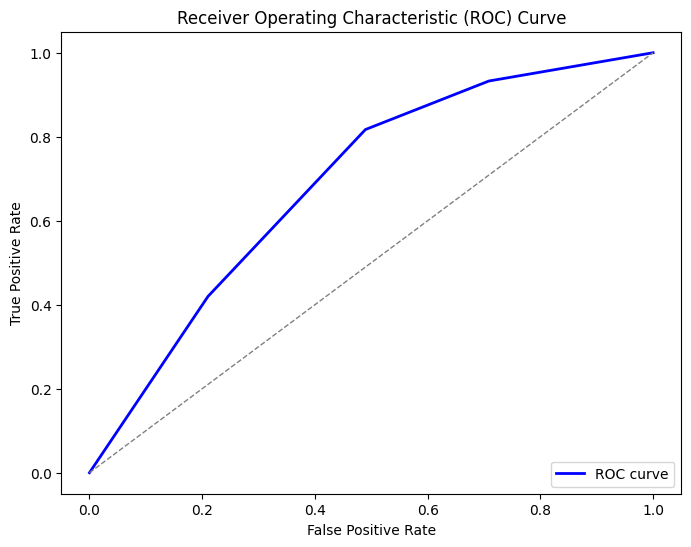

In [280]:
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Best K: 19
Performance Metrics:
Training Accuracy: 0.76
Training Precision: 0.77
Training Recall: 0.91
Training F1-Score: 0.84

Test Accuracy: 0.76
Test Precision: 0.77
Test Recall: 0.91
Test F1-Score: 0.83


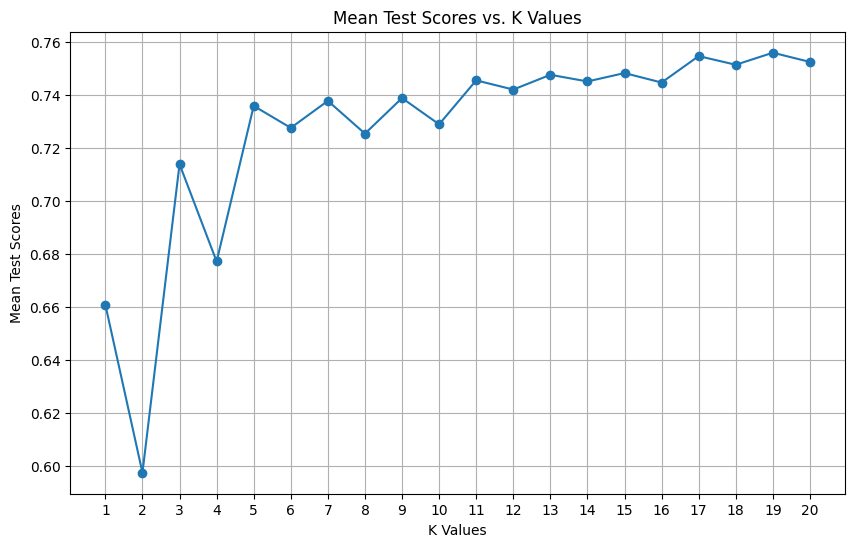

In [281]:
param_grid = {'n_neighbors': range(1, 21)}  # Range of K values from 1 to 20

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search to find the best K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']
print("Best K:", best_k)

# Train KNN with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train_encoded)

# Predict the labels for the training and test sets
y_train_pred = knn_best.predict(X_train)
y_test_pred = knn_best.predict(X_test)

# Calculate performance metrics for training set
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
train_precision = precision_score(y_train_encoded, y_train_pred)
train_recall = recall_score(y_train_encoded, y_train_pred)
train_f1 = f1_score(y_train_encoded, y_train_pred)

# Calculate performance metrics for test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
test_precision = precision_score(y_test_encoded, y_test_pred)
test_recall = recall_score(y_test_encoded, y_test_pred)
test_f1 = f1_score(y_test_encoded, y_test_pred)

# Print performance metrics
print("Performance Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

# Extract the mean test scores and K values from the grid search results
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = range(1, 21)  # K values from 1 to 20

# Plot the mean test scores against K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Test Scores')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### MULTIVARIATE

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X_mv, y_mv, test_size=0.2, random_state=42)

In [283]:
k = 3  # You can change the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [284]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train_encoded)

# Predict the labels for the training and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate performance metrics for training set
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
train_precision = precision_score(y_train_encoded, y_train_pred)
train_recall = recall_score(y_train_encoded, y_train_pred)
train_f1 = f1_score(y_train_encoded, y_train_pred)

# Calculate performance metrics for test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
test_precision = precision_score(y_test_encoded, y_test_pred)
test_recall = recall_score(y_test_encoded, y_test_pred)
test_f1 = f1_score(y_test_encoded, y_test_pred)

# Print performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")


Training Accuracy: 0.91
Training Precision: 0.92
Training Recall: 0.95
Training F1-Score: 0.93

Test Accuracy: 0.83
Test Precision: 0.86
Test Recall: 0.89
Test F1-Score: 0.87


<Figure size 800x600 with 0 Axes>

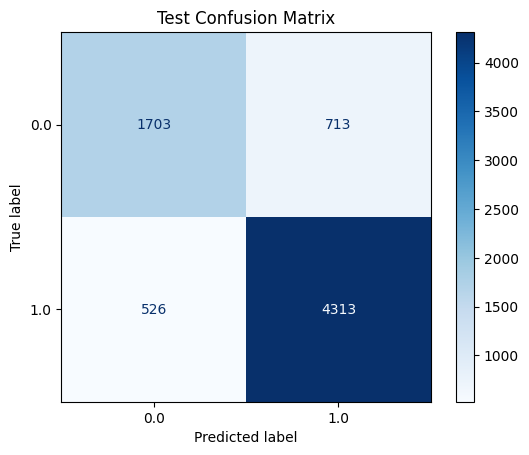

<Figure size 800x600 with 0 Axes>

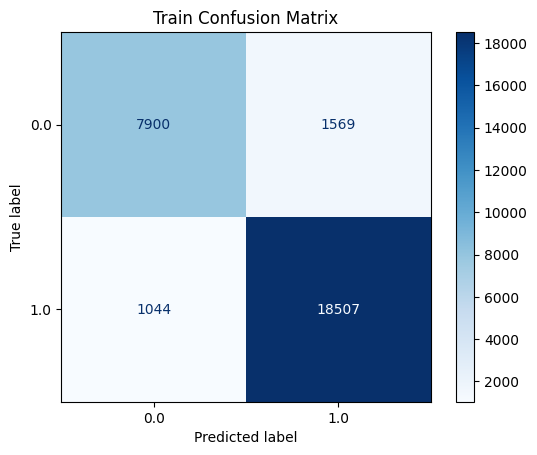

In [285]:
cm = confusion_matrix(y_test_encoded, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

 
    # Calculate the confusion matrix for the train set
cm = confusion_matrix(y_train_encoded, y_train_pred)
    # Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

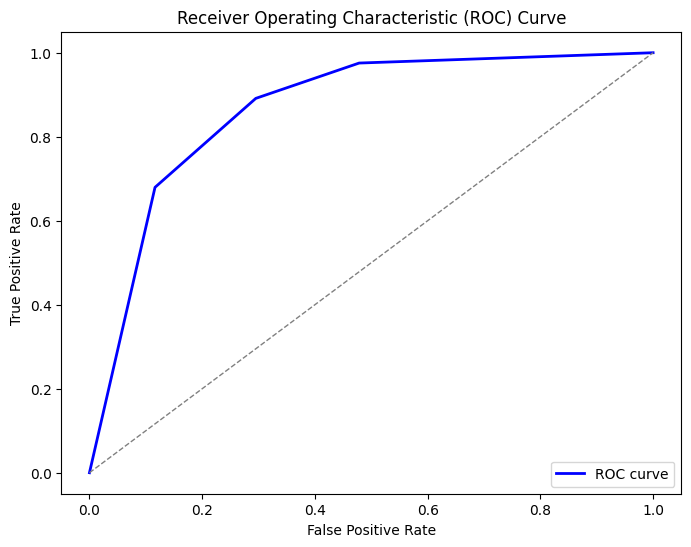

In [286]:
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Best K: 1
Performance Metrics:
Training Accuracy: 0.99
Training Precision: 0.99
Training Recall: 0.99
Training F1-Score: 0.99

Test Accuracy: 0.83
Test Precision: 0.87
Test Recall: 0.87
Test F1-Score: 0.87


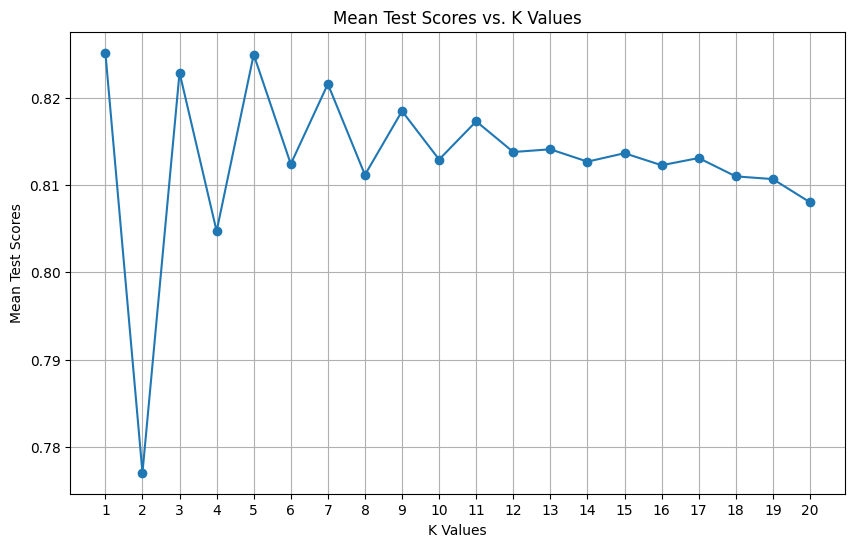

In [287]:
param_grid = {'n_neighbors': range(1, 21)}  # Range of K values from 1 to 20

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search to find the best K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Get the best K value
best_k = grid_search.best_params_['n_neighbors']
print("Best K:", best_k)

# Train KNN with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train_encoded)

# Predict the labels for the training and test sets
y_train_pred = knn_best.predict(X_train)
y_test_pred = knn_best.predict(X_test)

# Calculate performance metrics for training set
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
train_precision = precision_score(y_train_encoded, y_train_pred)
train_recall = recall_score(y_train_encoded, y_train_pred)
train_f1 = f1_score(y_train_encoded, y_train_pred)

# Calculate performance metrics for test set
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
test_precision = precision_score(y_test_encoded, y_test_pred)
test_recall = recall_score(y_test_encoded, y_test_pred)
test_f1 = f1_score(y_test_encoded, y_test_pred)

# Print performance metrics
print("Performance Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

# Extract the mean test scores and K values from the grid search results
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = range(1, 21)  # K values from 1 to 20

# Plot the mean test scores against K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Test Scores')
plt.xticks(k_values)
plt.grid(True)
plt.show()